The notebook concat the inidividuals df's collected from each news media outlet. Then, it cleans a bit before conducting EDA.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install openpyxl


In [ ]:
import pandas as pd

df_TV2 = pd.read_csv('/content/gdrive/My Drive/Thesis/Data/TV2/tv2.csv')
df_DR = pd.read_csv('/content/gdrive/My Drive/Thesis/Data/DR/DR.csv')
df_BT = pd.read_csv('/content/gdrive/My Drive/Thesis/Data/BT/BT.csv')
df_KD = pd.read_csv('/content/gdrive/My Drive/Thesis/Data/KD/KD.csv')
df_NJ = pd.read_csv('/content/gdrive/My Drive/Thesis/Data/Nordjyske/nordjyske.csv')
df_Inf = pd.read_csv('/content/gdrive/My Drive/Thesis/Data/Information/Information.csv')
df_CW = pd.read_csv('/content/gdrive/My Drive/Thesis/Data/Computerworld/computerworld.csv')
df_Berlingske = pd.read_csv('/content/gdrive/My Drive/Thesis/Data/Berlingske/Berlingske.csv')
df_Pol = pd.read_csv('/content/gdrive/My Drive/Thesis/Data/Politikken/Politikken.csv')
df_Ing = pd.read_excel('/content/gdrive/My Drive/Thesis/Data/Ing/Ing.xlsx')
df_JP = pd.read_csv('/content/gdrive/My Drive/Thesis/Data/JP/JP.csv')
df_Fin = pd.read_csv('/content/gdrive/My Drive/Thesis/Data/Finans/finans.csv')
df_JV = pd.read_csv('/content/gdrive/My Drive/Thesis/Data/JV/JV.csv')
df_EB = pd.read_csv('/content/gdrive/My Drive/Thesis/Data/EB/EB.csv')

In [ ]:
df_Ing = df_Ing.rename(columns={'title': 'header'})

month_mapping = {
    'januar': 'January', 'februar': 'February', 'marts': 'March', 'april': 'April',
    'maj': 'May', 'juni': 'June', 'juli': 'July', 'august': 'August',
    'september': 'September', 'oktober': 'October', 'november': 'November', 'december': 'December'
}

# I had not fixed dates for Ing. doing it here
def clean_date(date_str):
    if 'kl.' in date_str:
        cleaned_date = date_str.split('kl.')[0].strip()
    else:
        cleaned_date = date_str

    for danish_month, english_month in month_mapping.items():
        cleaned_date = cleaned_date.replace(danish_month, english_month)

    if not any(char.isdigit() for char in cleaned_date.split()[-1]):
        cleaned_date += ' 2024'

    return cleaned_date

df_Ing['cleaned_date'] = df_Ing['date'].apply(clean_date)

df_Ing['date'] = pd.to_datetime(df_Ing['cleaned_date'], format='%d. %B %Y', errors='coerce')
df_Ing.drop(columns=['cleaned_date'], inplace=True)

df_Ing['merged_content'] = df_Ing.apply(lambda row: ' '.join(
    str(part) if isinstance(part, str) else ''
    for part in [
        row['header'] if row['header'] != 'no header' else '',
        row['subheader'] if row['subheader'] != 'no subheader' else '',
        row['content']
    ]), axis=1)


In [ ]:
# as the webscraping process took some time, i had accidently at somepoint changed
# how i phrased the various columns. streamlining them here

df_TV2 = df_TV2.rename(columns={'keyword': 'search_term'})
df_DR = df_DR.rename(columns={'search term': 'search_term'})
df_NJ = df_NJ.rename(columns={'search term': 'search_term', 'merged_text': 'merged_content'})
df_Inf = df_Inf.rename(columns={'search term': 'search_term'})
df_KD = df_KD.rename(columns={'merged_text': 'merged_content'})
df_CW = df_CW.rename(columns={'title': 'header'})
df_Pol = df_Pol.rename(columns={'title': 'header'})
df_Ing = df_Ing.rename(columns={'title': 'header'})
df_JP = df_JP.rename(columns={'title': 'header'})
df_BT = df_BT.rename(columns={'content': 'merged_content'})
df_NJ['search_term'] = 'ansigtsgenkendelse'
df_EB['date'] = df_EB['date'].str[:10]
df_JP['date'] = df_JP['date'].str[:10]
df_JP = df_JP.rename(columns={'title': 'header'})
df_JP['merged_content'] = df_JP['header'] + ' ' + df_JP['content']
df_Fin['merged_content'] = df_Fin['header'] + ' ' + df_Fin['content']
df_Fin['date'] = df_Fin['date'].str[:10]

In [ ]:
# adding the outlet name to their respective df
df_TV2['source'] = 'TV2'
df_DR['source'] = 'DR'
df_BT['source'] = 'BT'
df_KD['source'] = 'KD'
df_NJ['source'] = 'Nordjyske'
df_Inf['source'] = 'Information'
df_CW['source'] = 'Computerworld'
df_Berlingske['source'] = 'Berlingske'
df_Pol['source'] = 'Politiken'
df_Ing['source'] = 'Teknologiens mediehus'
df_JP['source'] = 'Jyllands Posten'
df_Fin['source'] = 'Finans'
df_EB['source'] = 'Ekstrabladet'
df_JV['source'] = 'Jydske Vestkysten'

In [ ]:
# bc df_KD had some NaN values in subheader, the merged_content variable was not created correctly by just had NaN in it.
def merge_text(row):
    parts = [row['header'], row['subheader'], row['content']]
    parts = [part for part in parts if pd.notnull(part)]
    return ' '.join(parts)

df_KD['merged_content'] = df_KD.apply(merge_text, axis=1)


In [ ]:

dfs = [df_TV2, df_DR, df_BT, df_KD, df_NJ, df_Inf, df_CW, df_Berlingske, df_Pol, df_Ing, df_JP, df_Fin, df_EB, df_JV]

# concenate to one
df_combined = pd.concat(dfs, ignore_index=True)

In [ ]:
df_combined.drop(columns=['header', 'subheader', 'category', 'content', 'Unnamed: 0'], inplace=True)
df_combined

,url,search_term,date,merged_content,source
0,https://nyheder.tv2.dk/krimi/2024-08-08-rigspo...,facial recognition,2024-08-08,Rigspolitichef forsøger at berolige befolkning...,TV2
1,https://nyheder.tv2.dk/tech/2019-01-20-der-kan...,facial recognition,2019-01-20,FC København vil benytte sig af ansigtsgenkend...,TV2
2,https://echo.tv2.dk/samfund/2020-01-07-24-aari...,facial recognition,2020-01-07,Politiet tager hul på første projekt med ansig...,TV2
3,https://nyheder.tv2.dk/2015-02-02-forbrugerraa...,facial recognition,2015-02-02,Lufthavn i Singapore erstatter pas med ansigts...,TV2
4,https://nyheder.tv2.dk/tech/2009-08-04-test-et...,facial recognition,2009-08-04,"Ansigtsgenkendelse er på alle måder en ""god id...",TV2
...,...,...,...,...,...
5465,https://jv.dk/gear/ny-kia-picanto-er-en-dyr-li...,sikkerhedspakke overvågning,2024-08-11,Ny Kia Picanto er en dyr lille sag Den fornyed...,Jydske Vestkysten
5466,https://jv.dk/kolding/fem-fik-smadret-deres-bi...,tryghedsskabende kamera,2024-10-05,Fem fik smadret deres biler på samkørselsplads...,Jydske Vestkysten
5467,https://jv.dk/danmark/venstre-vil-have-oekonom...,tryghedsskabende kamera,2024-08-15,Venstre vil have økonomisk kriminelle til at b...,Jydske Vestkysten
5468,https://jv.dk/esbjerg/trussel-om-at-bygge-stoe...,tryghedsskabende kamera,2024-07-03,"Trussel om at bygge større rockerborg, hvis ik...",Jydske Vestkysten


In [ ]:
df_combined = df_combined.drop_duplicates(subset=['url', 'date', 'merged_content','source'], keep='first')
df_combined

,url,search_term,date,merged_content,source
0,https://nyheder.tv2.dk/krimi/2024-08-08-rigspo...,facial recognition,2024-08-08,Rigspolitichef forsøger at berolige befolkning...,TV2
1,https://nyheder.tv2.dk/tech/2019-01-20-der-kan...,facial recognition,2019-01-20,FC København vil benytte sig af ansigtsgenkend...,TV2
2,https://echo.tv2.dk/samfund/2020-01-07-24-aari...,facial recognition,2020-01-07,Politiet tager hul på første projekt med ansig...,TV2
3,https://nyheder.tv2.dk/2015-02-02-forbrugerraa...,facial recognition,2015-02-02,Lufthavn i Singapore erstatter pas med ansigts...,TV2
4,https://nyheder.tv2.dk/tech/2009-08-04-test-et...,facial recognition,2009-08-04,"Ansigtsgenkendelse er på alle måder en ""god id...",TV2
...,...,...,...,...,...
5465,https://jv.dk/gear/ny-kia-picanto-er-en-dyr-li...,sikkerhedspakke overvågning,2024-08-11,Ny Kia Picanto er en dyr lille sag Den fornyed...,Jydske Vestkysten
5466,https://jv.dk/kolding/fem-fik-smadret-deres-bi...,tryghedsskabende kamera,2024-10-05,Fem fik smadret deres biler på samkørselsplads...,Jydske Vestkysten
5467,https://jv.dk/danmark/venstre-vil-have-oekonom...,tryghedsskabende kamera,2024-08-15,Venstre vil have økonomisk kriminelle til at b...,Jydske Vestkysten
5468,https://jv.dk/esbjerg/trussel-om-at-bygge-stoe...,tryghedsskabende kamera,2024-07-03,"Trussel om at bygge større rockerborg, hvis ik...",Jydske Vestkysten


In [ ]:
# making even more sure that date is in the correct format
df_combined['date'] = pd.to_datetime(df_combined['date'], errors='coerce')

df = df_combined[df_combined['date'].isna() | (df_combined['date'] >= pd.Timestamp('2014-01-01'))]



<ipython-input-11-9ebe20793f29>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['date'] = pd.to_datetime(df_combined['date'], errors='coerce')


,url,search_term,date,merged_content,source
0,https://nyheder.tv2.dk/krimi/2024-08-08-rigspo...,facial recognition,2024-08-08,Rigspolitichef forsøger at berolige befolkning...,TV2
1,https://nyheder.tv2.dk/tech/2019-01-20-der-kan...,facial recognition,2019-01-20,FC København vil benytte sig af ansigtsgenkend...,TV2
2,https://echo.tv2.dk/samfund/2020-01-07-24-aari...,facial recognition,2020-01-07,Politiet tager hul på første projekt med ansig...,TV2
3,https://nyheder.tv2.dk/2015-02-02-forbrugerraa...,facial recognition,2015-02-02,Lufthavn i Singapore erstatter pas med ansigts...,TV2
5,https://nyheder.tv2.dk/business/2021-06-01-ans...,facial recognition,2021-06-01,Ansigtsgenkendelse blev stridspunktet i EU – d...,TV2
...,...,...,...,...,...
5465,https://jv.dk/gear/ny-kia-picanto-er-en-dyr-li...,sikkerhedspakke overvågning,2024-08-11,Ny Kia Picanto er en dyr lille sag Den fornyed...,Jydske Vestkysten
5466,https://jv.dk/kolding/fem-fik-smadret-deres-bi...,tryghedsskabende kamera,2024-10-05,Fem fik smadret deres biler på samkørselsplads...,Jydske Vestkysten
5467,https://jv.dk/danmark/venstre-vil-have-oekonom...,tryghedsskabende kamera,2024-08-15,Venstre vil have økonomisk kriminelle til at b...,Jydske Vestkysten
5468,https://jv.dk/esbjerg/trussel-om-at-bygge-stoe...,tryghedsskabende kamera,2024-07-03,"Trussel om at bygge større rockerborg, hvis ik...",Jydske Vestkysten


In [ ]:

df = df.dropna(subset=['merged_content'])


In [ ]:
# adding the additional variables
media_categorisation = {
    "Berlingske": "National broadsheet",
    "BT": "Tabloid",
    "Computerworld": "Specialized publication",
    "DR": "Public service",
    "Ekstrabladet": "Tabloid",
    "Finans": "Specialized publication",
    "Information": "National broadsheet",
    "Jydske Vestkysten": "Regional paper",
    "Jyllands Posten": "National broadsheet",
    "KD": "Regional paper",
    "Nordjyske": "Regional paper",
    "Politiken": "National broadsheet",
    "Teknologiens mediehus": "Specialized publication",
    "TV2": "Public service"
}

partisan_leaning = {
    "Berlingske": "Right-leaning",
    "BT": "Right-leaning",
    "Computerworld": "Technology-focused, non-political",
    "DR": "Neutral",
    "Ekstrabladet": "Left-leaning",
    "Finans": "Finance-focused, non-political",
    "Information": "Left-leaning",
    "Jydske Vestkysten": "Center-right",
    "Jyllands Posten": "Right-leaning",
    "KD": "Right-leaning",
    "Nordjyske": "Centrist",
    "Politiken": "Left-leaning",
    "Teknologiens mediehus": "Technology-focused, non-political",
    "TV2": "Neutral"
}

df['categorisation'] = df['source'].map(categorisation)
df['political_orientation'] = df['source'].map(political_orientation)

df


<ipython-input-33-9b1024e6449e>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['categorisation'] = df['source'].map(categorisation)
<ipython-input-33-9b1024e6449e>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['political_orientation'] = df['source'].map(political_orientation)


,url,search_term,date,merged_content,source,categorisation,political_orientation
0,https://nyheder.tv2.dk/krimi/2024-08-08-rigspo...,facial recognition,2024-08-08,Rigspolitichef forsøger at berolige befolkning...,TV2,Public service,Neutral
1,https://nyheder.tv2.dk/tech/2019-01-20-der-kan...,facial recognition,2019-01-20,FC København vil benytte sig af ansigtsgenkend...,TV2,Public service,Neutral
2,https://echo.tv2.dk/samfund/2020-01-07-24-aari...,facial recognition,2020-01-07,Politiet tager hul på første projekt med ansig...,TV2,Public service,Neutral
3,https://nyheder.tv2.dk/2015-02-02-forbrugerraa...,facial recognition,2015-02-02,Lufthavn i Singapore erstatter pas med ansigts...,TV2,Public service,Neutral
5,https://nyheder.tv2.dk/business/2021-06-01-ans...,facial recognition,2021-06-01,Ansigtsgenkendelse blev stridspunktet i EU – d...,TV2,Public service,Neutral
...,...,...,...,...,...,...,...
5465,https://jv.dk/gear/ny-kia-picanto-er-en-dyr-li...,sikkerhedspakke overvågning,2024-08-11,Ny Kia Picanto er en dyr lille sag Den fornyed...,Jydske Vestkysten,Regional paper,Center-right
5466,https://jv.dk/kolding/fem-fik-smadret-deres-bi...,tryghedsskabende kamera,2024-10-05,Fem fik smadret deres biler på samkørselsplads...,Jydske Vestkysten,Regional paper,Center-right
5467,https://jv.dk/danmark/venstre-vil-have-oekonom...,tryghedsskabende kamera,2024-08-15,Venstre vil have økonomisk kriminelle til at b...,Jydske Vestkysten,Regional paper,Center-right
5468,https://jv.dk/esbjerg/trussel-om-at-bygge-stoe...,tryghedsskabende kamera,2024-07-03,"Trussel om at bygge større rockerborg, hvis ik...",Jydske Vestkysten,Regional paper,Center-right


In [ ]:
from google.colab import files
df.to_csv('final_sample.csv', index=False)
files.download('final_sample.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
df = pd.read_csv('/content/gdrive/My Drive/Thesis/final_sample.csv')
df

,url,search_term,date,merged_content,source,categorisation,political_orientation
0,https://nyheder.tv2.dk/krimi/2024-08-08-rigspo...,facial recognition,2024-08-08,Rigspolitichef forsøger at berolige befolkning...,TV2,Public service,Neutral
1,https://nyheder.tv2.dk/tech/2019-01-20-der-kan...,facial recognition,2019-01-20,FC København vil benytte sig af ansigtsgenkend...,TV2,Public service,Neutral
2,https://echo.tv2.dk/samfund/2020-01-07-24-aari...,facial recognition,2020-01-07,Politiet tager hul på første projekt med ansig...,TV2,Public service,Neutral
3,https://nyheder.tv2.dk/2015-02-02-forbrugerraa...,facial recognition,2015-02-02,Lufthavn i Singapore erstatter pas med ansigts...,TV2,Public service,Neutral
4,https://nyheder.tv2.dk/business/2021-06-01-ans...,facial recognition,2021-06-01,Ansigtsgenkendelse blev stridspunktet i EU – d...,TV2,Public service,Neutral
...,...,...,...,...,...,...,...
3682,https://jv.dk/gear/ny-kia-picanto-er-en-dyr-li...,sikkerhedspakke overvågning,2024-08-11,Ny Kia Picanto er en dyr lille sag Den fornyed...,Jydske Vestkysten,Regional paper,Center-right
3683,https://jv.dk/kolding/fem-fik-smadret-deres-bi...,tryghedsskabende kamera,2024-10-05,Fem fik smadret deres biler på samkørselsplads...,Jydske Vestkysten,Regional paper,Center-right
3684,https://jv.dk/danmark/venstre-vil-have-oekonom...,tryghedsskabende kamera,2024-08-15,Venstre vil have økonomisk kriminelle til at b...,Jydske Vestkysten,Regional paper,Center-right
3685,https://jv.dk/esbjerg/trussel-om-at-bygge-stoe...,tryghedsskabende kamera,2024-07-03,"Trussel om at bygge større rockerborg, hvis ik...",Jydske Vestkysten,Regional paper,Center-right


Making sure only relevant articles related to FRT is included in the analysis:

In [ ]:
import pandas as pd
import re

# List of search terms + more found in reading articles during webscraping process that relates to frt
search_terms = [
    'ansigtsgenkendelse', 'facial recognition', 'face recognition', 'ansigtsaftryk',
    'ansigtsscan', 'masseovervågning', 'ansigtskamera', 'overvågning ansigt', 'biometrisk overvågning',
    'overvågningssamfund ansigt', 'sikkerhedspakke', 'tryghedsskabende kamera', 'overvågning ansigt', 'sikkerhedsovervågning',
    'intelligent kamera', 'ai overvågning'
]

df['merged_content'] = df['merged_content'].str.lower()
df['merged_content'] = df['merged_content'].str.replace(r'[^\w\s]', ' ', regex=True)
df['merged_content'] = df['merged_content'].str.replace(r'\s+', ' ', regex=True).str.strip()


def generate_regex(term):
    words = term.split()
    if len(words) > 1:
        patterns = [re.escape(word) + r'\w*' for word in words]
        return r'\s+'.join(patterns)
    else:
        return re.escape(term) + r'\w*'

regex_pattern = '|'.join([generate_regex(term) for term in search_terms])

df_final = df[df['merged_content'].str.contains(regex_pattern, flags=re.IGNORECASE, regex=True)]

print(f"Total rows matching search terms: {len(df_final)}")



Total rows matching search terms: 2681


phew, that was tough. Seem there was much off-topic content being scraped before. We continues with a smaller sample.

In [ ]:
df_final.shape

(2681, 7)

In [ ]:
from google.colab import files
df_final.to_csv('final_final_final_sample.csv', index=False)
files.download('final_final_final_sample.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/gdrive/My Drive/Thesis/Data/final_final_final_sample.csv')


In [ ]:
df

,url,search_term,date,merged_content,source,categorisation,political_orientation
0,https://nyheder.tv2.dk/krimi/2024-08-08-rigspo...,facial recognition,2024-08-08,rigspolitichef forsøger at berolige befolkning...,TV2,Public service,Neutral
1,https://nyheder.tv2.dk/tech/2019-01-20-der-kan...,facial recognition,2019-01-20,fc københavn vil benytte sig af ansigtsgenkend...,TV2,Public service,Neutral
2,https://echo.tv2.dk/samfund/2020-01-07-24-aari...,facial recognition,2020-01-07,politiet tager hul på første projekt med ansig...,TV2,Public service,Neutral
3,https://nyheder.tv2.dk/2015-02-02-forbrugerraa...,facial recognition,2015-02-02,lufthavn i singapore erstatter pas med ansigts...,TV2,Public service,Neutral
4,https://nyheder.tv2.dk/business/2021-06-01-ans...,facial recognition,2021-06-01,ansigtsgenkendelse blev stridspunktet i eu dan...,TV2,Public service,Neutral
...,...,...,...,...,...,...,...
2676,https://jv.dk/bolig-og-livsstil/adam-laeser-ku...,ansigtsgenkendelse,2024-01-09,adam læser kunstig intelligens vil gøre livet ...,Jydske Vestkysten,Regional paper,Center-right
2677,https://jv.dk/udland/eu-naar-frem-til-aftale-o...,ansigtsgenkendelse,2023-12-08,eu når frem til regler for kunstig intelligens...,Jydske Vestkysten,Regional paper,Center-right
2678,https://jv.dk/danmark/minister-dropper-krav-om...,overvågningssamfund ansigt,2024-06-05,minister dropper krav om videoovervågning af f...,Jydske Vestkysten,Regional paper,Center-right
2679,https://jv.dk/danmark/venstre-vil-have-oekonom...,tryghedsskabende kamera,2024-08-15,venstre vil have økonomisk kriminelle til at b...,Jydske Vestkysten,Regional paper,Center-right


## EDA

<ipython-input-10-4d2bb1a007f6>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resampled_data = df_with_dates.set_index('date').resample('M').count()


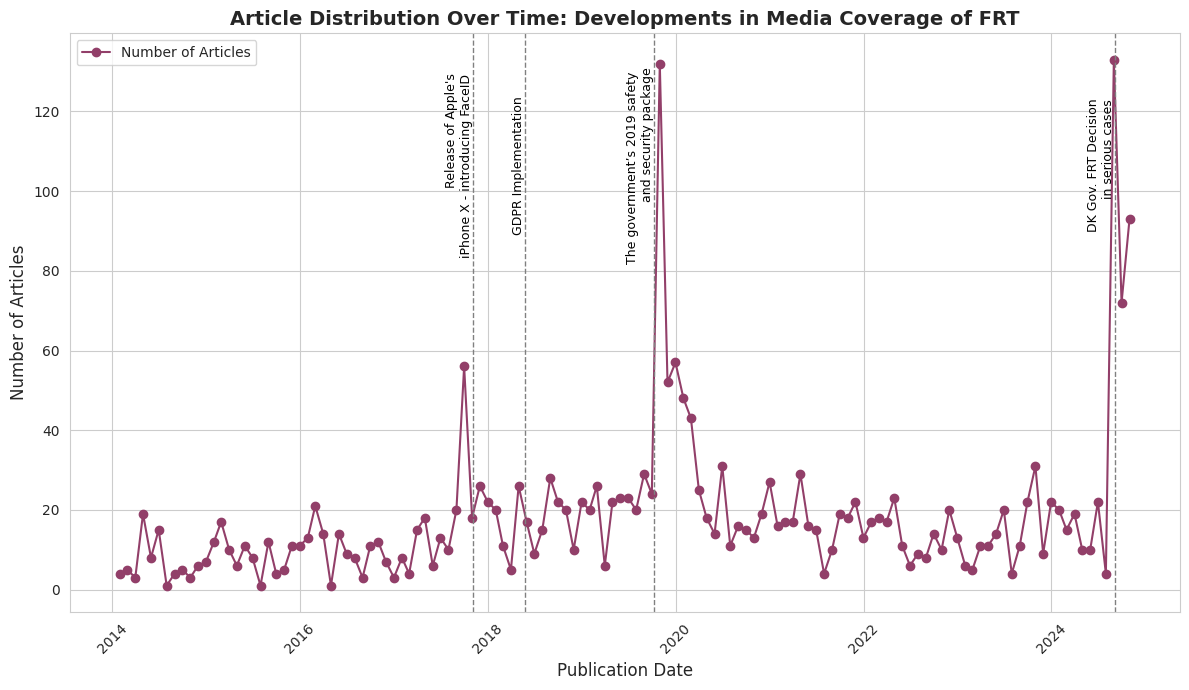

In [ ]:
# looking at published articles over time
resampled_data = df_with_dates.set_index('date').resample('M').count()

plt.figure(figsize=(12, 7))
plt.plot(resampled_data.index, resampled_data['count'], marker='o', linestyle='-', color='#923f69', label='Number of Articles')

plt.xlabel('Publication Date', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.title('Article Distribution Over Time: Developments in Media Coverage of FRT', fontsize=14, fontweight='bold')

for label, date in notable_dates.items():
    date = pd.to_datetime(date)
    plt.axvline(date, color='grey', linestyle='--', linewidth=1)
    plt.text(date, max(resampled_data['count']) * 0.8, label, rotation=90,
             verticalalignment='center', horizontalalignment='right', fontsize=9, color='black')

plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
!ls '/content/gdrive/My Drive/Thesis/lmroman7-regular.otf'


'/content/gdrive/My Drive/Thesis/lmroman7-regular.otf'
'/content/gdrive/My Drive/Thesis/lmroman7-italic.otf'


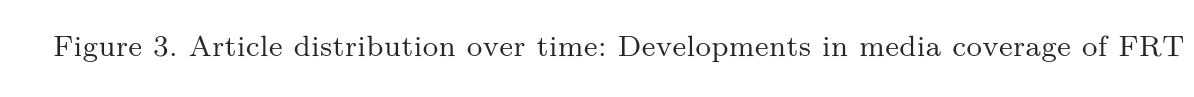

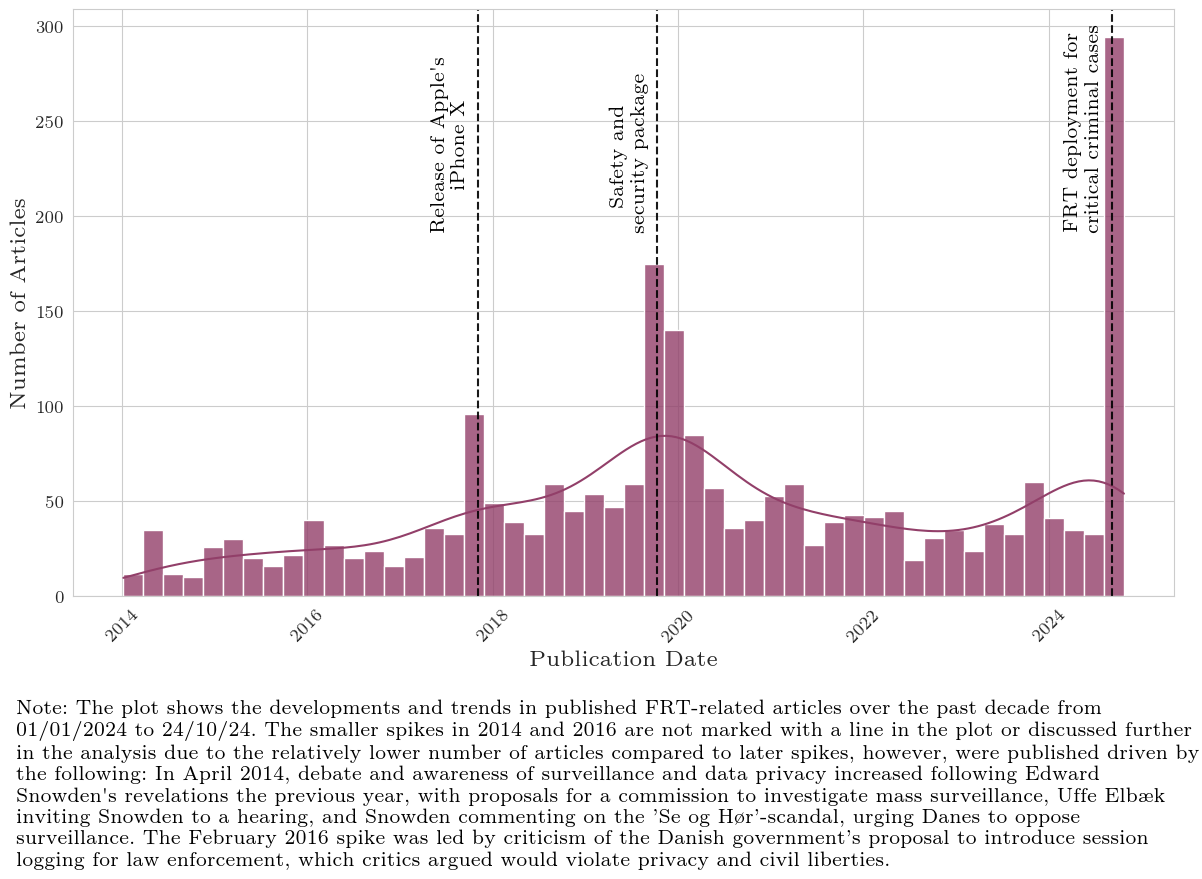

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib import rcParams
from matplotlib import font_manager as fm

# want a nice font
regular_font_path = '/content/gdrive/My Drive/Thesis/lmroman7-regular.otf'
regular_font = fm.FontProperties(fname=regular_font_path)

rcParams['font.family'] = regular_font.get_name()

df['date'] = pd.to_datetime(df['date'])
df_with_dates = df.dropna(subset=['date'])

sns.set_style("whitegrid")

fig_title = plt.figure(figsize=(12, 1))
plt.text(
    0.5, 0.5,
    '    Figure 3. Article distribution over time: Developments in media coverage of FRT',
    fontsize=20, fontproperties=regular_font, ha='center', va='center'
)
plt.axis('off')  # bc want different axes
plt.show()


plt.figure(figsize=(12, 7))
sns.histplot(df_with_dates['date'], bins=50, color="#923f69", kde=True, alpha=0.8)  # very nice in bourdeaux yes

plt.xlabel('Publication Date', fontsize=16, fontproperties=regular_font)
plt.ylabel('Number of Articles', fontsize=16, fontproperties=regular_font)

plt.xticks(fontsize=12, fontproperties=regular_font, rotation=45)
plt.yticks(fontsize=12, fontproperties=regular_font)

notable_dates = {
    'Release of Apple\'s\niPhone X': '2017-11-03',
    'Safety and \nsecurity package': '2019-10-10',
    'FRT deployment for \ncritical criminal cases': '2024-09-05'
}

for label, date in notable_dates.items():
    plt.axvline(pd.to_datetime(date), color='black', linestyle='--', linewidth=1.5, alpha=0.9)
    plt.text(
        pd.to_datetime(date) + pd.Timedelta(days=-110),
        plt.ylim()[1] * 0.62,
        label,
        rotation=90, verticalalignment='bottom', horizontalalignment='center',
        fontsize=14, color='black', fontproperties=regular_font
    )

plt.figtext(
    0.02, -0.25,
   "Note: The plot shows the developments and trends in published FRT-related articles over the past decade from 01/01/2024 to 24/10/24. The smaller spikes in 2014 and 2016 are not marked with a line in the plot or discussed further in the analysis due to the relatively lower number of articles compared to later spikes, however, were published driven by the following: In April 2014, debate and awareness of surveillance and data privacy increased following Edward Snowden's revelations the previous year, with proposals for a commission to investigate mass surveillance, Uffe Elbæk inviting Snowden to a hearing, and Snowden commenting on the ’Se og Hør’-scandal, urging Danes to oppose surveillance. The February 2016 spike was led by criticism of the Danish government’s proposal to introduce session logging for law enforcement, which critics argued would violate privacy and civil liberties.",
    wrap=True, horizontalalignment='left', fontsize=14, color='black', fontproperties=regular_font
)



plt.tight_layout()
plt.show()


Looking at the ealier spikes:

In [ ]:

article_counts = df_with_dates['date'].value_counts().sort_index()

threshold = 5
spike_dates = article_counts[article_counts > threshold]

spike_articles = df_with_dates[df_with_dates['date'].isin(spike_dates.index)]


Spike dates and article counts:
date
2014-04-24     6
2016-05-20     6
2017-09-12    16
2017-09-13    15
2019-10-08    16
2019-10-09    28
2019-10-10    24
2019-10-11     8
2019-10-24    19
2019-12-01     6
2019-12-02     6
2020-01-21     7
2020-02-19     9
2020-06-11     8
2020-06-19     6
2021-11-02     8
2022-01-28     6
2022-02-11     6
2023-06-14     6
2023-09-21     8
2023-10-03    12
2023-10-04     6
2023-10-05     9
2023-12-08     6
2024-01-19     6
2024-02-02     6
2024-06-21     6
2024-08-08    20
2024-08-09    11
2024-08-12    17
2024-08-13    16
2024-08-17     6
2024-08-31    12
2024-09-05    14
2024-09-06     7
2024-09-09     7
2024-09-12     6
2024-10-24    90
Name: count, dtype: int64
Articles during the spikes:
                                                    url         search_term  \
0     https://nyheder.tv2.dk/krimi/2024-08-08-rigspo...  facial recognition   
11    https://nyheder.tv2.dk/udland/2019-12-01-nu-sk...         ansigtsscan   
12    https://nyheder.tv2.

In [ ]:

# Lets check our the articles from 2014
df_2014 = df[df['date'].dt.year == 2014]
df_2014_sorted = df_2014.head(50).sort_values(by='date', ascending=True)


In [ ]:
df_2014_sorted.loc[268]['merged_content']

'elbæk inviterer snowden til dansk høring whistlebloweren edward snowden blev i dag afvist da folketinget skulle stemme om at give amerikaneren der afslørede omfattende overvågning politisk asyl i danmark alle undtagen enhedslisten og uffe elbæk stemte imod det skuffede i høj grad uffe elbæk alternativet der også havde fremsat forslaget han gik efterfølgende på talerstolen og inviterede derfra edward snowden til en høring om masseovervågning i folketingets retsudvalg enhedslisten støttede straks op om invitationen jeg er dybt skuffet over at et flertal i folketinget i dag har afvist at give whistlebloweren edward snowden opholdstilladelse i danmark men det er glædeligt at der er bred anerkendelse af at snowden har rejst en vigtig debat fortæller nikolaj villumsen enhedslisten tidligere har snowden deltaget i lignende høringer i eu parlamentet og europarådets parlamentariske forsamling med en høring i folketinget håber vi at få løftet sløret for omfanget af masseovervågning i danmark sn

In [ ]:
df_2014_sorted.loc[279]['merged_content']

'snowden om se og hør læk et valg mellem borgere og spioner måske den største skandale om it sikkerhed nogensinde i danmark sådan omtaler seniorjurist i forbrugerrådet tænk anette høyrup den læk der har gjort det muligt for en i dag 45 årig it specialist i nets at sælge data om kendte og kongelige videre til se og hør og samtidig med at skandalen tilsyneladende ingen ende vil tage blander selv whistlebloweren edward snowden sig i debatten se og hørs påståede handlinger er en påmindelse om at vores rettigheder er på spil indtil folketinget skrider til handling og kommer til bunds i problemet med masseovervågning skriver edward snowden ifølge berlingske i et brev hvor han også har en opfordring til danskerne spørg om de står på borgernes eller spionernes side skriver snowden avisen har modtaget brevet fra den amerikanske flygtning der lever i asyl i moskva hvor han efter at en kontakt i danmark har sendt ham informationer om se og hør sagen tilsyneladende af egen drift har valgt at komme

In [ ]:
spike_articles.loc[281]['merged_content']


'sf vil have kommission til at kulegrave overvågning alle partier ønsker mere viden om overvågningen af danskerne men regeringen afviser forslag om kommission sf vil have regeringen til at nedsætte en kommission der skal undersøge omfanget af overvågningen af danskerne det tidligere regeringsparti frygter at masseovervågningen er løbet løbsk og vil have lovgivningen på området strammet det siger karina lorentzen retsordfører for sf og formand for folketingets retsudvalg til berlingske overvågningen antager i dag rigtig mange ansigter og de bunkevis af data der ligger om danskerne på nettet giver mulighed for at tegne nogle meget tætte og præcise personprofiler af folk og man ved ikke hvor de informationer ender henne hvad de bliver brugt til og hvem der køber dem det er rigtigt ubehageligt siger hun til avisen overvågning af private personers computere og mobiltelefoner har været et af de største temaer globalt efter det seneste års mange afsløringer fra whistlebloweren edward snowden 

In [ ]:

# Lets check our the articles from 2016
df_2016 = df[df['date'].dt.year == 2016]
df_2016_sorted = df_2016.head(50).sort_values(by='date', ascending=True)
df_2016_sorted


,url,search_term,date,merged_content,source,categorisation,political_orientation
552,https://www.bt.dk/forbrug/nu-kan-du-sende-peng...,ansigtsgenkendelse,2016-01-04,dit fingeraftryk kan på nyere smartphones give...,BT,Tabloid,Right-leaning
185,https://nyheder.tv2.dk/tech/2016-01-12-godkend...,masseovervågning ansigt,2016-01-12,godkendt nu må politiet overvåge 600 000 bilis...,TV2,Public service,Neutral
273,https://nyheder.tv2.dk/politik/2016-01-29-la-r...,masseovervågning ansigt,2016-01-29,la regeringen må indføre lov uden os hvis rege...,TV2,Public service,Neutral
186,https://nyheder.tv2.dk/politik/2016-01-29-la-r...,masseovervågning ansigt,2016-01-29,la regeringen må indføre lov uden os no subhea...,TV2,Public service,Neutral
187,https://nyheder.tv2.dk/politik/2016-01-30-tidl...,masseovervågning ansigt,2016-01-30,tidligere pet chef langer ud efter internetove...,TV2,Public service,Neutral
274,https://nyheder.tv2.dk/politik/2016-01-30-tidl...,masseovervågning ansigt,2016-01-30,tidligere pet chef langer ud efter internetove...,TV2,Public service,Neutral
189,https://nyheder.tv2.dk/udland/2016-02-02-eu-og...,masseovervågning ansigt,2016-02-02,eu og usa enes om datastrøm over atlanten det ...,TV2,Public service,Neutral
427,https://www.dr.dk/nyheder/viden/tech/super-bow...,ansigtsgenkendelse,2016-02-05,super bowl 50 er et højteknologisk sportsbrag ...,DR,Public service,Neutral
28,https://nyheder.tv2.dk/politik/2016-02-09-krit...,masseovervågning ansigt,2016-02-09,undgå at blive overvåget med disse briller hvi...,TV2,Public service,Neutral
277,https://nyheder.tv2.dk/politik/2016-02-09-krit...,masseovervågning ansigt,2016-02-09,kritik fra egne rækker venstres ungdom kritise...,TV2,Public service,Neutral


In [ ]:
df_2016_sorted.loc[277]['merged_content']

'kritik fra egne rækker venstres ungdom kritiserer omstridt forslag det meget omstridte forslag fra regeringen om at genindføre sessionslogning møder nu kritik fra en ny kant venstres egen ungdomsafdeling kalder nemlig forslaget for en direkte trussel mod borgernes retssikkerhed det skriver information som retssamfund må vi aldrig ty til masseovervågning for at bekæmpe kriminalitet siger chris preuss formand i venstres ungdom man mistænker allesessionslogning gør det muligt at lagre oplysninger om borgernes aktiviteter på internettet fra mobiltelefoner man vil mistænke alle borgere for at være potentielle terrorister eller kriminelle ved at overvåge dem alle sammen i stedet for som i dag hvor man er uskyldig indtil andet er bevist tilføjer chris preuss til avisen sessionslogningen blev afskaffet i 2014 af den tidligere regering da logningen havde vist sig ikke at leve op til formålet nemlig at hjælpe politiets efterforskning forslaget er ikke liberalther var den nuværende skatteministe

In [ ]:
df_2016_sorted.loc[190]['merged_content']

'rigspolitichef giv os adgang til danskernes internetforbrug rigspolitichefen ønsker at danskernes internetforbrug bliver registreret mens kritikerne tordner mod regeringens planer om at tvinge internet og teleselskaber til at opbevare oplysninger om danskernes internettrafik går rigspolitichef jens henrik højbjerg nu i brechen for justitsminister søren pinds v kontroversielle plan det skriverberlingsketirsdag rigspolitichefen ser ikke regeringens forslag om den såkaldte sessionslogning som overvågning i stedet sidestiller han i et interview med berlingske sessionslogning med de muligheder politiet allerede i dag har til med en dommerkendelse at hente op til et år gamle teleoplysninger hos teleselskaberne jeg har ikke indtryk af at folk undlader at bruge deres telefoner fordi politiet har mulighed for at hente teleoplysninger siger jens henrik højbjerg til berlingske se ogsåumage alliance drop masseovervågning pindnormalt blander rigspolitichefen sig ikke i kommende lovgivning men i de

In [ ]:
df_2016_sorted.loc[265]['merged_content']

'pind internetovervågning er nødvendigt når et lovforslag om en ny internetovervågning inden for kort tid bliver fremlagt så har danskerne ikke noget at frygte sessionslogningen som i praksis betyder at teleselskaberne bliver pålagt at indsamle data er et nødvendigt redskab for at politiet kan udføre deres arbejde og der bliver ingen masseovervågning af danskerne det er søren pinds overordnede budskab efter tv 2 har talt med ministeren nogle har travlt med at putte alle mulige etiketter på det her fordi de også er imod det regelsæt vi har haft med mobiltelefoner mit indtryk er ikke at danskerne føler sig massivt overvågede i forhold til deres mobiltelefonforbrug og derfor accepterer jeg ikke den præmis kræver dommerkendelsepå intet tidspunkt vil myndigheder kunne se borgernes data uden der først er indhentet en dommerkendelse data vil ikke blive opbevaret i myndighedernes varetægt det bliver kun tilgængeligt med en dommerkendelse og efter at en advokat for den pågældende har været inde

In [ ]:
# looking at mean articles per months for each year


df['date'] = pd.to_datetime(df['date'])

monthly_counts = df.groupby([df['date'].dt.year.rename('Year'), df['date'].dt.month.rename('Month')]).size().reset_index(name='article_count')

yearly_stats = monthly_counts.groupby('Year')['article_count'].agg(['mean', 'median']).reset_index()
yearly_stats.columns = ['Year', 'Average_Articles_Per_Month', 'Median_Articles_Per_Month']

print(yearly_stats)


      Year  Average_Articles_Per_Month  Median_Articles_Per_Month
0   2014.0                    6.666667                        5.0
1   2015.0                    9.000000                       10.5
2   2016.0                    9.666667                       10.0
3   2017.0                   18.000000                       16.5
4   2018.0                   17.083333                       18.5
5   2019.0                   36.166667                       23.5
6   2020.0                   23.333333                       18.5
7   2021.0                   16.333333                       16.5
8   2022.0                   13.833333                       13.5
9   2023.0                   13.833333                       11.0
10  2024.0                   39.800000                       19.5


In [ ]:
# Reading through articles in first spike

start_date = '2017-10-01'
end_date = '2017-11-01'

spike_articles = df_with_dates[(df_with_dates['date'] >= start_date) & (df_with_dates['date'] <= end_date)]


spike_articles['url'][3389]#.head(60) # [1881]


'https://finans.dk/tech/ECE9993524/med-iphone-x-viser-apple-igen-sin-sans-for-teknologisk-timing/'

In [ ]:
# Reading through articles in spike in middle

start_date = '2019-11-01'
end_date = '2019-12-01'

spike_articles = df_with_dates[(df_with_dates['date'] >= start_date) & (df_with_dates['date'] <= end_date)]

# Display the filtered articles
spike_articles['merged_content']#.head(50)# [1727][1274]# [3578]#[115] [3578]


,merged_content
11,Foto af ansigt kan hjælpe børn med sjældne syg...
64,Jon Dahl behøver ikke at undskylde for jubelsc...
155,Derfor bliver de kendte misbrugt på Facebook ...
158,Amin Skovs ven politianmelder 3F Frank Schwan...
160,DF: Alle danskere i DNA-register Dansk Folkep...
...,...
3117,"Det kan spænde ben for retssikkerheden, hvis m..."
3119,Lækkede dokumenter afslører Kinas undertrykkel...
3257,Der kan sættes alvorlige spørgsmålstegn ved Ti...
3346,Dansk it-selskab får ny kapitalindsprøjtning f...


In [ ]:

df['date'] = pd.to_datetime(df['date'])
df_with_dates = df.dropna(subset=['date'])

monthly_counts = df_with_dates.resample('M', on='date').size()

average_monthly_articles = monthly_counts.mean()

print(f"Average number of articles produced each month over the past decade: {average_monthly_articles:.2f}")


Average number of articles produced each month over the past decade: 18.19


<ipython-input-9-7d326878d773>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = df_with_dates.resample('M', on='date').size()


<ipython-input-10-5277fa571ef1>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=search_term_counts.index, y=search_term_counts.values, palette="viridis")


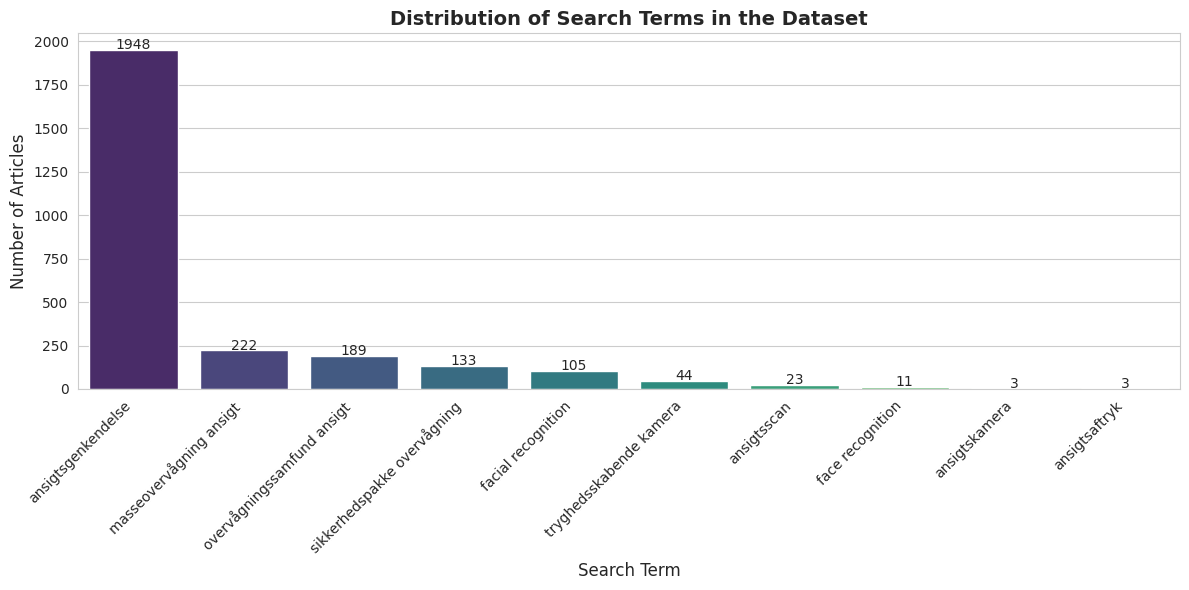

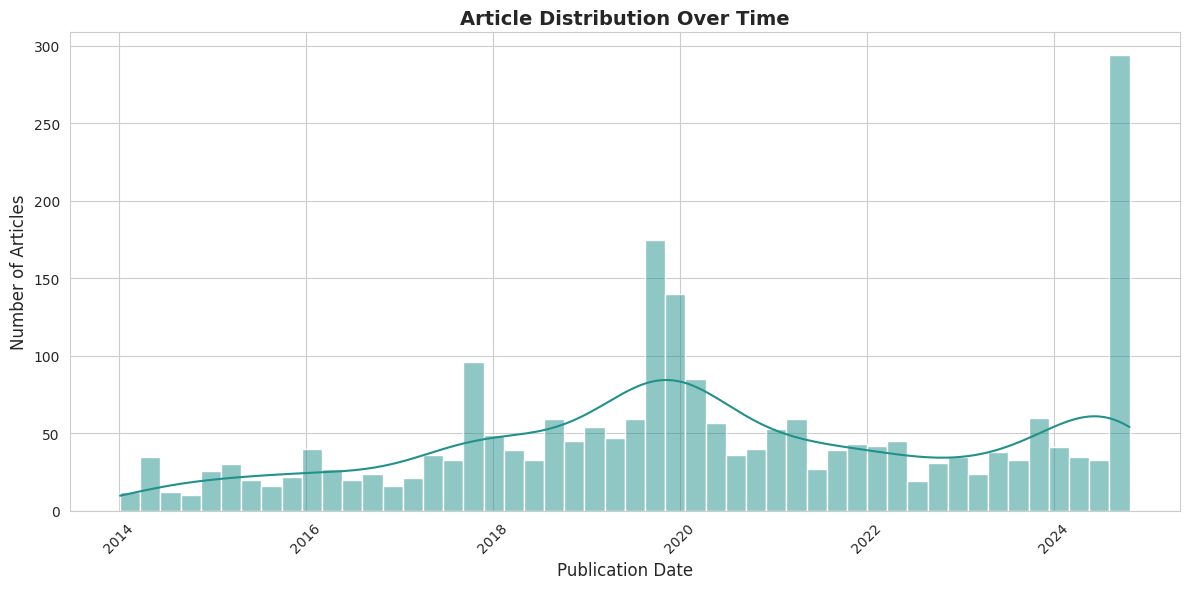

<ipython-input-10-5277fa571ef1>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=source_counts.index, y=source_counts.values, palette="viridis")


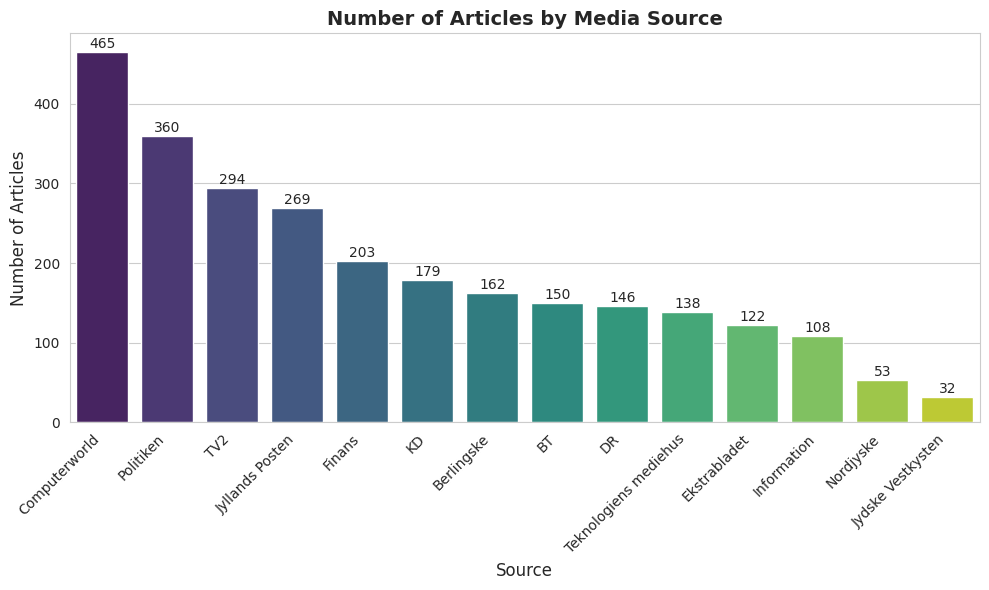

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


sns.set_style("whitegrid")
color_palette = sns.color_palette("viridis", as_cmap=True)

search_term_counts = df['search_term'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=search_term_counts.index, y=search_term_counts.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.xlabel('Search Term', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.title('Distribution of Search Terms in the Dataset', fontsize=14, fontweight='bold')

for index, value in enumerate(search_term_counts.values):
    plt.text(index, value + 5, str(value), ha='center', fontsize=10)

plt.tight_layout()
plt.show()


df['date'] = pd.to_datetime(df['date'])
df_with_dates = df.dropna(subset=['date'])
plt.figure(figsize=(12, 6))
sns.histplot(df_with_dates['date'], bins=50, color=color_palette(0.5), kde=True)
plt.xlabel('Publication Date', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.title('Article Distribution Over Time', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


source_counts = df['source'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=source_counts.index, y=source_counts.values, palette="viridis")
plt.xlabel('Source', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.title('Number of Articles by Media Source', fontsize=14, fontweight='bold')


for index, value in enumerate(source_counts.values):
    plt.text(index, value + 5, str(value), ha='center', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:

source_counts = df['source'].value_counts()
source_counts_percentage = (source_counts / source_counts.sum()) * 100

source_counts_df = pd.DataFrame({
    'Count': source_counts,
    'Percentage': round(source_counts_percentage, 2)
})

# Display the result
print(source_counts_df)


                       Count  Percentage
source                                  
Computerworld            465       17.34
Politiken                360       13.43
TV2                      294       10.97
Jyllands Posten          269       10.03
Finans                   203        7.57
KD                       179        6.68
Berlingske               162        6.04
BT                       150        5.59
DR                       146        5.45
Teknologiens mediehus    138        5.15
Ekstrabladet             122        4.55
Information              108        4.03
Nordjyske                 53        1.98
Jydske Vestkysten         32        1.19


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns


In [ ]:

media_category_counts = df['categorisation'].value_counts()

media_category_percentages = df['categorisation'].value_counts(normalize=True) * 100

media_category_summary = pd.DataFrame({
    'Count': media_category_counts,
    'Percentage': round(media_category_percentages,2)
})

print(media_category_summary)


                         Count  Percentage
categorisation                            
National broadsheet        899       33.53
Specialized publication    806       30.06
Public service             440       16.41
Tabloid                    272       10.15
Regional paper             264        9.85


In [ ]:
# accidently gave jydske vestkysten the incorrect partisan leaning
df.loc[df['source'] == 'Jydske Vestkysten', 'political_orientation'] = 'Right-leaning'

# Verify the changes
print(df_final[df['source'] == 'Jydske Vestkysten']['political_orientation'].unique())


['Right-leaning']


In [ ]:

partisan_counts = df['political_orientation'].value_counts()
partisan_counts_percentage = (partisan_counts / partisan_counts.sum()) * 100


partisan_counts_df = pd.DataFrame({
    'Count': partisan_counts,
    'Percentage': round(partisan_counts_percentage,2)
})

print(partisan_counts_df)


                                   Count  Percentage
political_orientation                               
Right-leaning                        792       29.54
Technology-focused, non-political    603       22.49
Left-leaning                         590       22.01
Neutral                              440       16.41
Finance-focused, non-political       203        7.57
Centrist                              53        1.98


## Making stratified sampling based on number of weekly readers


As the total dataset consists of more articles than what is feasible to analyze manually considering the time- and funding constraints of the study, the qualitative analysis is conducted on a subset of the collected data. Given that the various media outlets in the dataset sample is based on which outlets granted their permission, it likely does not accurately reflect the Danish media environment; for example, the niche outlet ComputerWorld has the lowest reach in weekly number of readers, yet the highest number of articles. If the articles included in the subset for the qualitative analysis, which the frames are to be identified based on, would have been only randomly drawn from the dataset, without considering this reach, then smaller niche outlets such as Computerworld would likely be overrepresented in the qualitative analysis. Since the paper is interested in analyzing framing of FRT in the general news media environment, outlets with bigger reach likely have a greater influence on public opinion and discourse. As such, the subset sample for the qualitative analysis was created in a manner where articles were randomly drawn from each media outlet, proportional to its weekly number of readers.

In [ ]:
import pandas as pd

# weekly readers for each source
readers = {
    'Politiken': 492000,
    'BT': 366000,
    'Jyllands Posten': 340000,
    'Jydske Vestkysten': 489657,
    'KD': 209000,
    'Information': 165000,
    'Berlingske': 333000,
    'Teknologiens mediehus': 180000,
    'Computerworld': 145000,
    'Nordjyske': 154000,
    'Finans': 150000,
    'TV2': 500000, # as no info on reach for these news articles, but knowing that have a large audience, giving them a reach higher than the other outlets
    'DR': 500000,
    'Ekstrabladet': 2580000
}

total_readers = sum(readers.values())

sample_size = 90
proportions = {source: (readers[source] / total_readers) * sample_size for source in readers}

sampled_df = pd.DataFrame()


for source, proportion in proportions.items():
    source_df = df[df['source'] == source]

    n_articles = int(proportion)
    if len(source_df) >= n_articles and n_articles > 0:
        sampled_articles = source_df.sample(n=n_articles)
        sampled_df = pd.concat([sampled_df, sampled_articles])

sampled_df = sampled_df.reset_index(drop=True)

sampled_df.to_excel('sample.xlsx', index=False)

from google.colab import files
files.download('sample.xlsx')


Getting the sample for labelling articles which are going to be used for the development of the classifiers

In [ ]:

indices_not_in_qual_sample = df.index.difference(sampled_df.index)
random_indices = np.random.choice(indices_not_in_sample, size=min(500, len(indices_not_in_sample)), replace=False)

random_articles_df = df.loc[random_indices]

random_articles_df.to_excel('sample_for_classifiers.xlsx', index=False)

files.download('sample_for_classifiers.xlsx')